:HoloMap   [u]
   :NdOverlay   [Element]
      :Contours   [x,y]
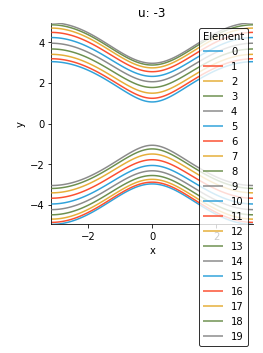
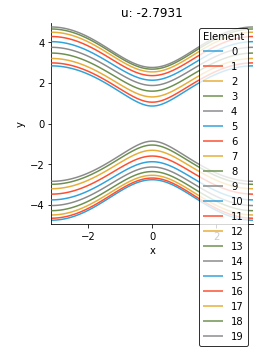
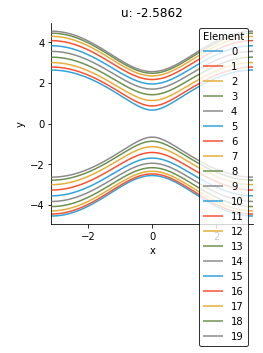
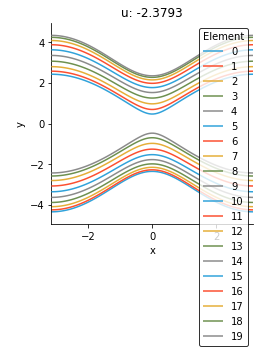
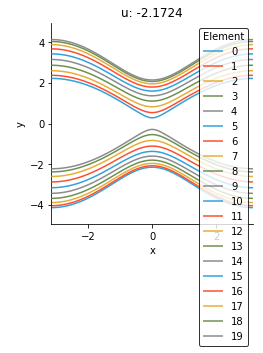
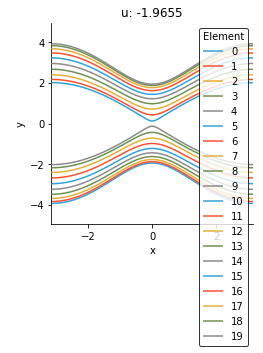
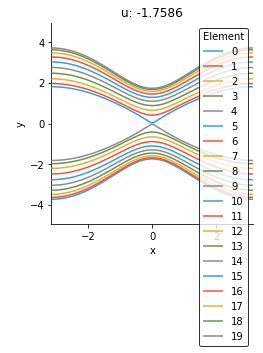
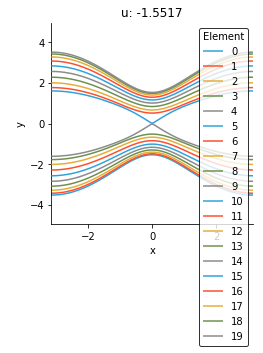
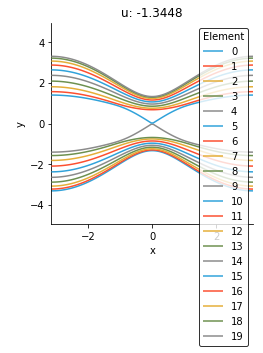
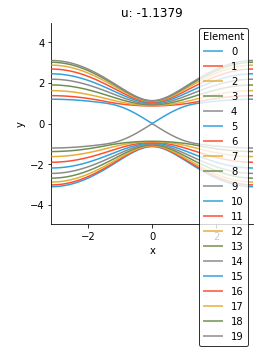
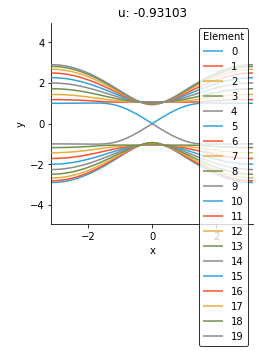
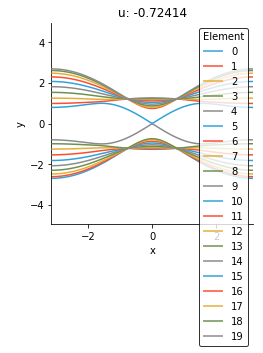
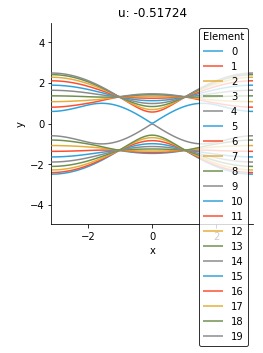
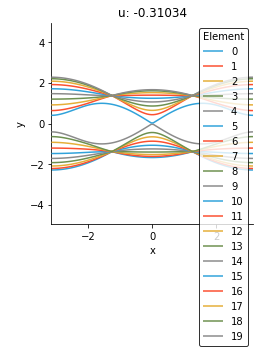
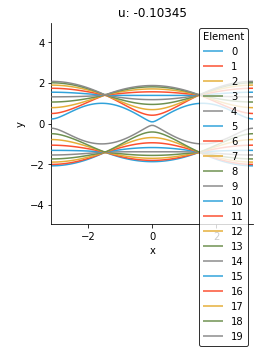
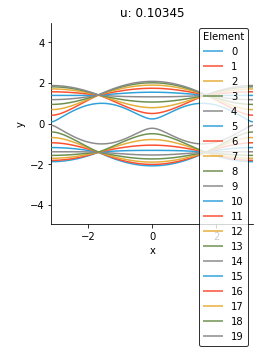
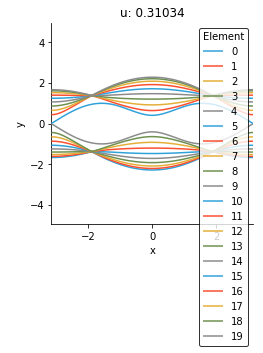
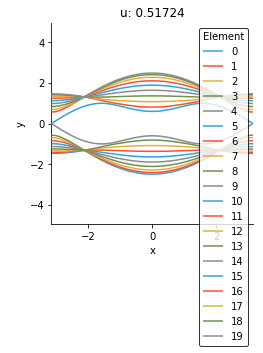
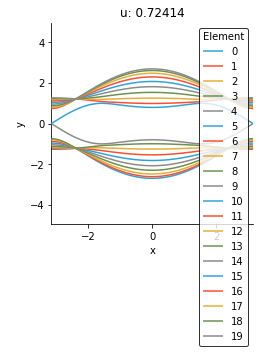
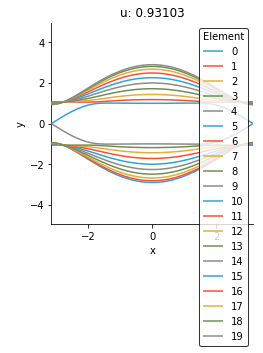
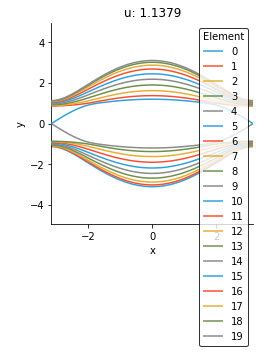
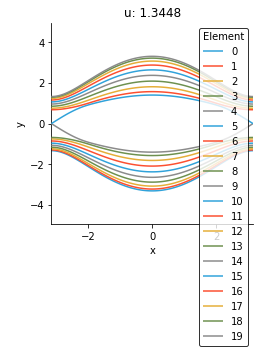
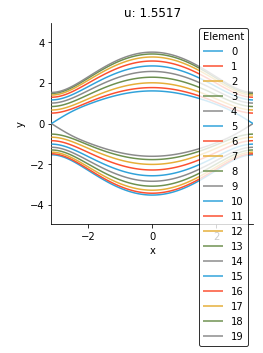
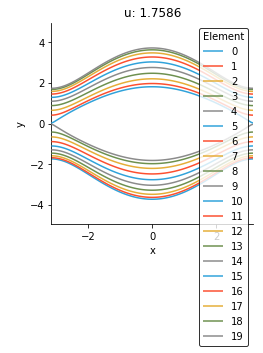
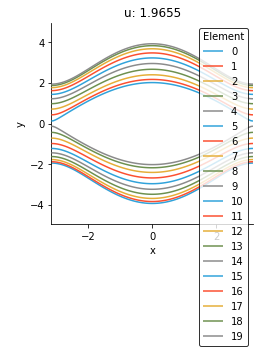
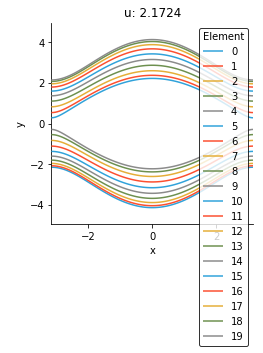
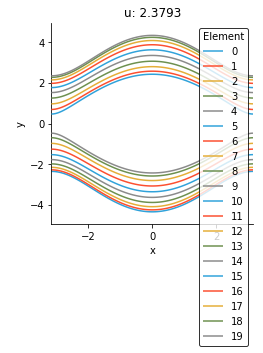
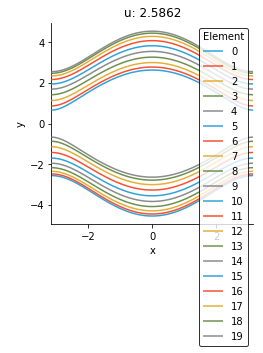
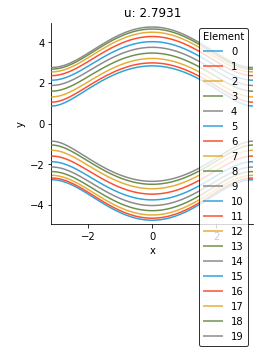
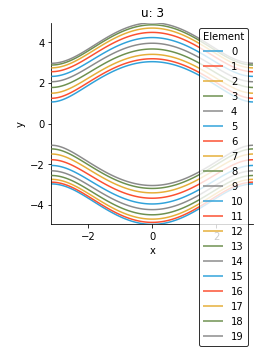

In [32]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
import holoviews as hv
hv.extension('matplotlib')

N=10
s=100

#Define pauli matrices
sx = np.matrix([[0,1],[1,0]])
sy = np.matrix([[0,-1j],[1j,0]])
sz = np.matrix([[1,0],[0,-1]])

k_range = np.linspace(-np.pi,np.pi,s)


def spec(u):
    spectrum=np.zeros((N*2,s))
    for i in np.arange(s):
        k = k_range[i]

        H = np.kron(0.5*(sz+1j*sx),np.diag(np.ones(N-1),-1))
        H += H.H
        H += np.kron(np.cos(k)*sz + np.sin(k)*sy + u*sz,np.eye(N))
       
        vals, vecs = np.linalg.eigh(H)
        spectrum[:,i]=vals
    return plot(k_range,spectrum.T)

uvals=np.linspace(-3,3,30)   
curve_dict = {(u):spec(u) for u in uvals}
hmap = hv.HoloMap(curve_dict, kdims=['u'])
hmap